# Ariline Customer Satisfaction Clustering (Lab #3: DS7331)

SMU Student collaboration:
1. Renfeng Wang
2. Alexander Sepenu
3. Zachary Zaiken
4. Venkata 'MG' Vanga
---------------------------------------------

## 1.0 Business Understanding

The data used in this analysis is from the "Airline Passenger Satisfaction" dataset sourced from Kaggle. 

https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction.  
        
This dataset comes from a survey that measured Airline passenger satisfaction and to understand the various factors that contribute to airline passenger perceived level of satisfaction. The survey was conducted to gather data so the airline companies could improve on Quality of Service (QoS) that will meet the expectations of passengers and help these companies stay competitive within the industry. The model when built will help these companies' direct resources that will target specific attributes to improve on services hence saving them millions of dollars that would otherwise gone to a gamut of service improvement campaigns. The dataset can be leveraged into a supervised machine learning classification model that can predict customer satisfaction for this dataset set as well as predict future flights experiences based on attributes and datapoints used.

In this Lab 3 we mainly focus on clustering different attributes of the dataset. The reasons we chose this dataset are 

1. Some of the attributes have similarities, which can likely be clustered. 


2. Most of the attributes are discrete variables containing different levels. Though it is unclear exactly where to split discrete variables and how many levels we should make at this point, the purpose of our lab 3 is to try a few different parameterizations to investigate this (numbers of cluster and the algorithm for clustering).

The algorithms will be used are Kmeans, Agglomerative Clustering, DBSCAN and KMode. The metrics will be used are average accuracy and we will include silhouette analysis and elbow method as exceptional Work.

## 2.0 Data Understanding 1

In [1]:
import pandas as pd
import numpy as np
# read in the csv file
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

#### Below table shows all the data types, attributes' descriptions and scale of values for the dataset. 

- Continuous Variables are highlighted in light gray
- Ordinal variables highlighted in light blue and 
- Categorical variables are shown in white color.

![DataDesc-2.jpg](attachment:DataDesc-2.jpg)

In [2]:
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We can observe from the above table that there are 24 attributes in the dataset. 'Unnamed:0' being the ID of the each row. We will delete this attribute and continue with Exploratory Data Analysis (EDA) for the remaining 23 attributes.

In [3]:
if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

### Missing data

It can be observed from Data meaning type that there are total 129,880 records of data in each of 23 variables except for variable:'arrival_delay_in_minutes' which only has 129,487 records (393 missing).

The 393 missing values constitute about 0.3% of the total 'arrival_delay_in_minutes' count, since this is a such small count and may not have significant influence on final results, we are going to delete these rows and continue with our EDA.

In [4]:
airline_df = airline_df.dropna()
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

After removal of missing data, Entire dataset now only has 129,487 records for the EDA.

------


### Outlier detection/discussion:

#### Box plots for continuous variables:

<AxesSubplot:title={'center':'arrival_delay_in_minutes'}, xlabel='satisfaction'>

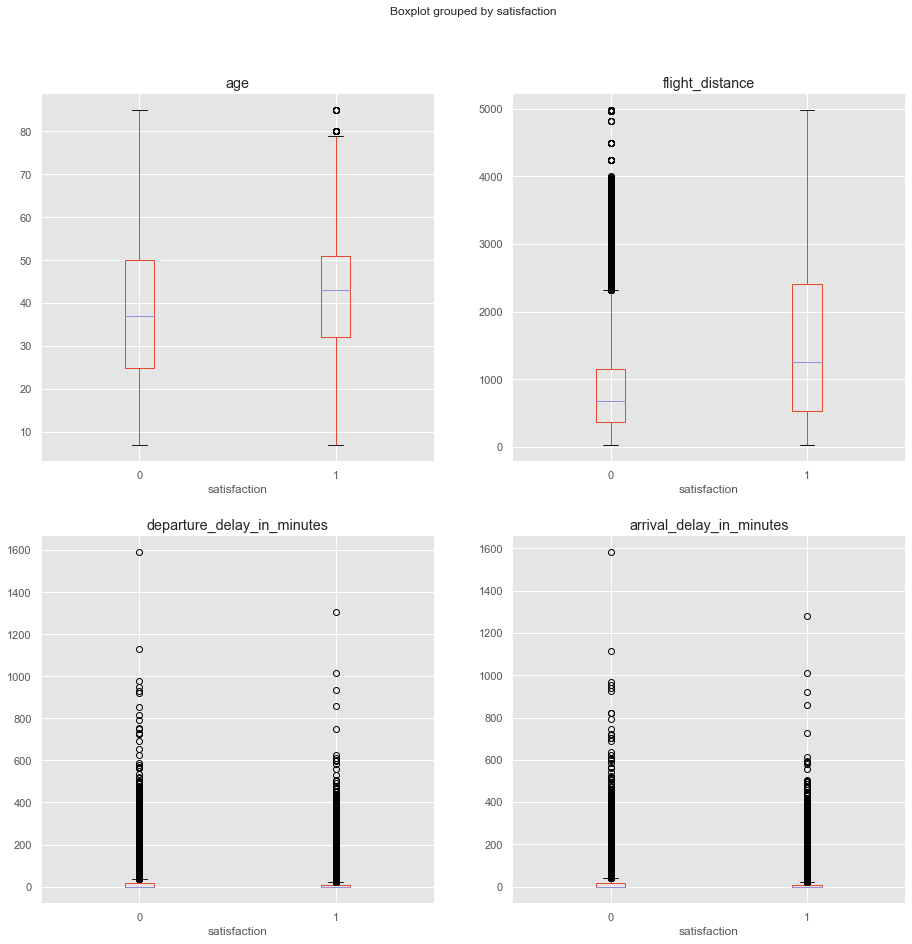

In [51]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=2,figsize = (15,15))
airline_df.boxplot(column='age', by='satisfaction', ax=axs[0,0])
airline_df.boxplot(column='flight_distance', by='satisfaction',ax=axs[0,1])
airline_df.boxplot(column='departure_delay_in_minutes', by='satisfaction',ax=axs[1,0])
airline_df.boxplot(column='arrival_delay_in_minutes', by='satisfaction',ax=axs[1,1])

We have checked for outliers in the dataset by boxplots. The only variables are subjected to this analysis are four continuous variables (departure_delay_in_minutes, arrival_delay_in_minutes, flight distance and age). There appeared to be some outliers, but not until we fit some models, can we calculate Cook's D or leverage to idenitify and deal with them.  

Having completed the classification assignments in Lab 2, these outliers are important to keep in the model as they can heaviliy influence a customer's flight satisfaction.  These will be left in the dataset as the we intend to combine and leverage both clustering and classifcation models.

Additional discussion for the outlier detection is shown below:

#### Using the 68–95–99 rule to detect Outliers 

Outliers:

Using the 68-95-99 rule, we can detect outliers in the various attribute. To explain this rule 68% of the data is within one standard deviation above or below the mean, and 95% of the data is within two standard deviations from the mean, also 99.7% of the data is within three standard deviations from the mean. With this rule of thumb only very few data points should be beyond three standard deviations from the mean, more precisely, only 0.3% of the data points. Therefore, any data point that is seen farther than three standard deviations is considered extreme and an outlier.

To check if a data point is an outlier and check if it falls farther than three standard deviations, we calculate:

Q1 – (1.5 * IQR)

Q3 + (1.5 * IQR)

These represent the lower and upper bounds of the area in the distribution that is not considered extreme. Which ends up being approximately 3 standard deviations from the mean. Hence, any data point lower than the lower bound or greater than the upper bound is an outlier and they are greater than the 3 standard deviations. 

Implying;
(ant data point value) < Q1– (1.5 * IQR), then it’s an outlier

(any data point value) > Q3 + (1.5 * IQR), then it’s an outlier

27.0
40.0
51.0
24.0
-9.0 87.0


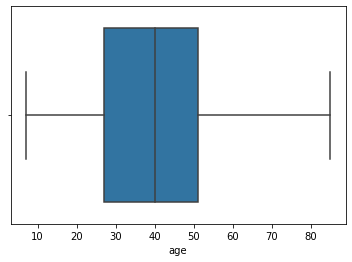

In [6]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['age'])

Q1 = airline_df['age'].quantile(0.25)

Q2 = airline_df['age'].quantile(0.50)

Q3 = airline_df['age'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

414.0
844.0
1744.0
1330.0
-1581.0 3739.0


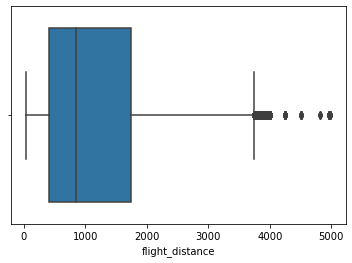

In [7]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['flight_distance'])

Q1 = airline_df['flight_distance'].quantile(0.25)

Q2 = airline_df['flight_distance'].quantile(0.50)

Q3 = airline_df['flight_distance'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
12.0
12.0
-18.0 30.0


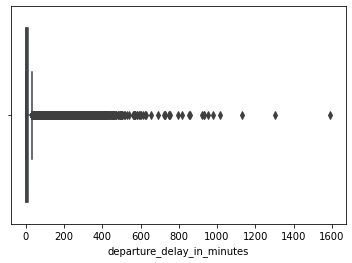

In [8]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['departure_delay_in_minutes'])

Q1 = airline_df['departure_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['departure_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['departure_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
13.0
13.0
-19.5 32.5


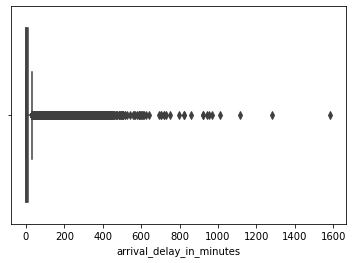

In [9]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['arrival_delay_in_minutes'])

Q1 = airline_df['arrival_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['arrival_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['arrival_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

#### Outlier Summary:

From the above computations on outliers, we aknowledge there are outliers in the dataset, however removing them would lose alot of potential insight on how customers determine flight satisfaction.  As such we will leave them in the EDA.  Potential solutions could be variable transformations into categorical.  The appropriateness of variables to include in clustering will be covered in 3.0 Data Understanding 2

-----

#### Duplicate data detection:

In [10]:
#Duplicated data check
airline_df[airline_df.duplicated()]

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction


We observe that there are no duplicated records in the entire dataset.  As such no further actions or removals are required on the dataset. 

## 3.0 Data Understanding 2

The code below creates list of different features that will be examined in pair plots and correlation matrices

In [11]:
# let's start first by collecting the continuous features
airline_continuous_features = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# and then the ordinal features.
airline_ordinal_features = ['inflight_wifi_service','departure_arrival_time_convenient','gate_location',
                    'food_and_drink','online_boarding','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service' ,'baggage_handling' ,'checkin_service' ,  
                     'inflight_service','cleanliness']

# we won't modify these variables, keep them as categorical
airline_categ_features = ['Gender','customer_type','type_of_travel','customer_class','satisfaction'];


airline_continuous_features_satis = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes','satisfaction']


airline_nonflight_ordinal_features_satis = ['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' , 'satisfaction']

#### Pair plots for continuous variables:

The chart below displays a pair plot of the 4 continuous variables in the dataset. With the response variable of interest "satisfaction" highlighted yellow for "satisfied" (1) and blue for "neutral or dissatisfied" (0).  This was done to investigate the correlation and clustering possibilties for clustering of continuous variables.  The only variables that have strong correlation are departure and arrival delay.  The other variable combinations do not provide strong evidence of clustering or trends.


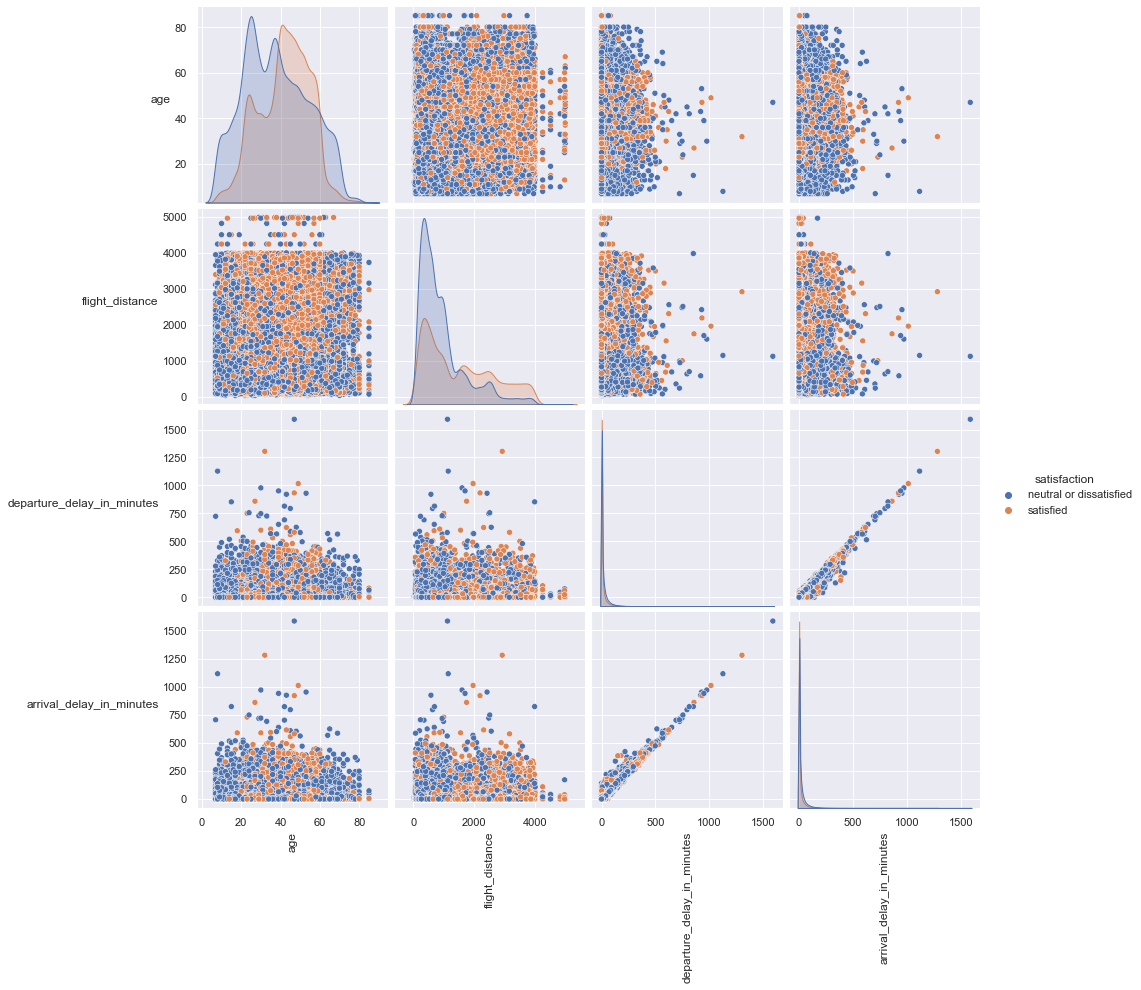

In [12]:
import seaborn as sns
sns.set()

g = sns.pairplot(airline_df[airline_continuous_features_satis], hue="satisfaction", height=3)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

#### Correlation matrix plot for continuous variables:

The plot below is the same variables as the pairplots above, this further supports the claim of no obvious correlation or clusters among continuous variables.

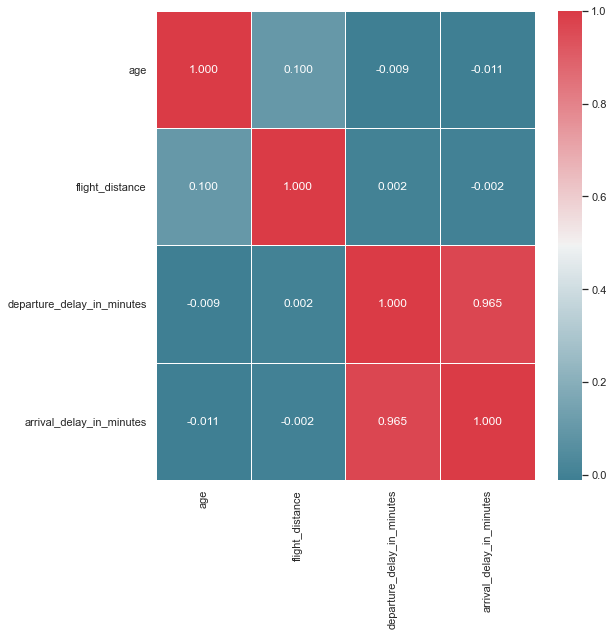

In [24]:
sns.set(style='darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax= plt.subplots(figsize=(9,9))

sns.heatmap(airline_df[airline_continuous_features].corr(),cmap=cmap,annot=True,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

#### Correlation matrix plot for ordinal variables:

The final chart in this section is a heat map correlation chart comparing all of the ordinal ranked variables.

From the chart it appears most ordinal variables are not correlated, although some do stick out:

inflight entertainment v. cleanliness (.692)
seat comfort v. cleanliness (.680)
food and drink v. cleanliness (.658)
baggage handling v. inflight service (.629)
food and drink v. inflight_entertainment (.623)
food and drink v. seat comfort (.576)

These will be the basis to investigate clustering and if accuracy can be improved by inclusion of an additional feature.

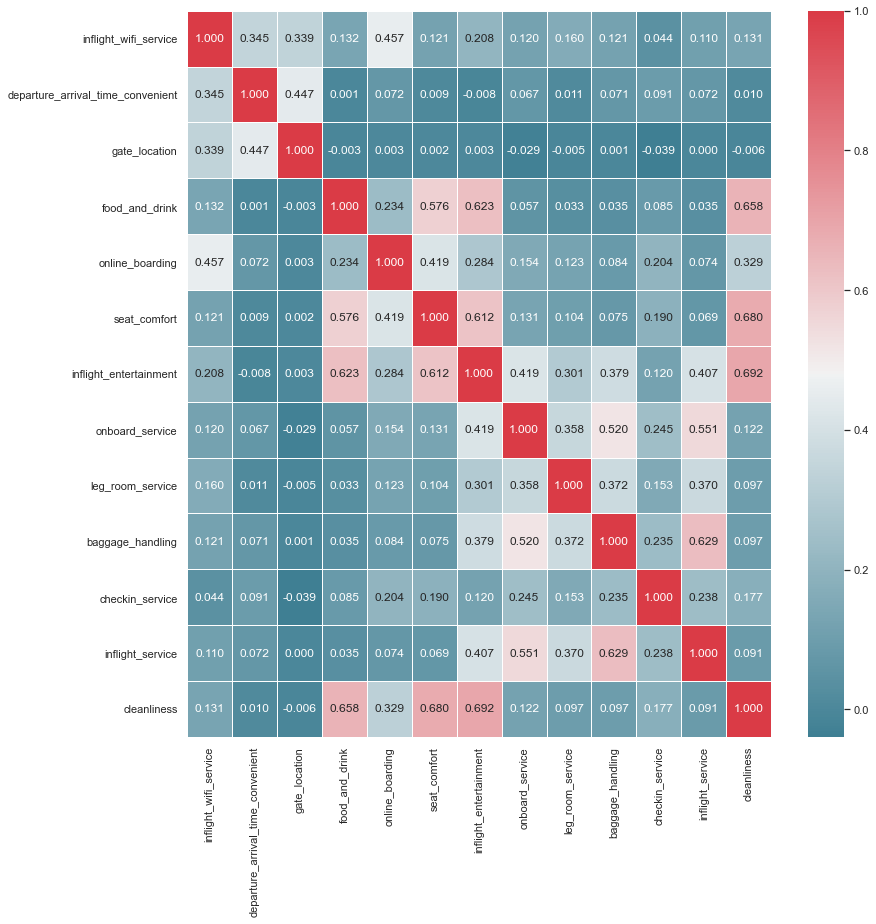

In [26]:
f, ax= plt.subplots(figsize=(13,13))
sns.heatmap(airline_df[airline_ordinal_features].corr(),cmap=cmap,annot=True,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

## 4.0 Modeling and Evaluation 1- Train and adjust parameters

Additional encoding is done on satisfaction to make it compatible with sklearn clustering and classifcation models.

In [13]:
Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]

y= airline_df['satisfaction'].copy()

In [14]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

### Cross Validation Method

For both classification and clustering tasks and all models, 10-fold stratified K-fold cross validation will be used. Using stratified ensures that the same class split percentages across all test and training splits are the same. This is important as  classes are imbalanced.  This ensures that for all for modeling training and testing the same percentage split of class is maintained. K fold also ensures that each test set are independent from one another. Other methodologies such as shuffle split will not guarantee that all folds will be different. Using 10-fold ensures the variance and bias tradeoff and will also ensure the model and predictions generated are used responsibly.

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
#Create Scaler
scl = StandardScaler()

#Split the data
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=5)                     
print(cv)

StratifiedKFold(n_splits=10, random_state=5, shuffle=True)


In [16]:
X = airline_df[['type_of_travel','customer_type','customer_class','baggage_handling','inflight_service',
                'cleanliness','inflight_entertainment']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
scl.fit(X)
X_scl = scl.transform(X)

clf = RandomForestClassifier(n_estimators=150,random_state=5,n_jobs=7,class_weight='balanced')

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  86.6457614796557 +- 0.18969742165155268


The base accuracy of the random forest classifier is 86.64%,  Based on the correlation matrices, we will try and cluster `inflight_entertainment` and `cleanliness` together because they have similar information.
We will start by using kmeans on `inflight_entertainment` and `cleanliness` together.

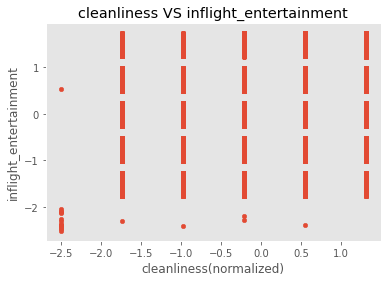

In [16]:
plt.style.use("ggplot")

X1 = airline_df[['inflight_entertainment','cleanliness']].values
scl.fit(X1)
X1_scl = scl.transform(X1)
plt.scatter(X1_scl[:, 1], X1_scl[:, 0]+np.random.random(X1_scl[:, 1].shape)/2, 
             s=20)
plt.xlabel('cleanliness(normalized)'), plt.ylabel('inflight_entertainment')
plt.grid()
plt.title('cleanliness VS inflight_entertainment')
plt.show()

From the graph above, we have visual evideince we can initialize the cluster numbers to 25

In [17]:
from sklearn.cluster import KMeans

X1 = airline_df[['inflight_entertainment','cleanliness']]

cls = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls.fit(X1)
newfeature = cls.labels_ 

X = airline_df[['type_of_travel','customer_type','customer_class','baggage_handling','inflight_service']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy (with kmeans for the first cluster)= ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy (with kmeans for the first cluster)=  86.64807820123113 +- 0.20113965278978768


This clustering helped increase the accuracy on average by about .003%, the deviation from the mean became a little bit higher.

Next cluster, we will start by using kmeans on `baggage handling` and `inflight service`.

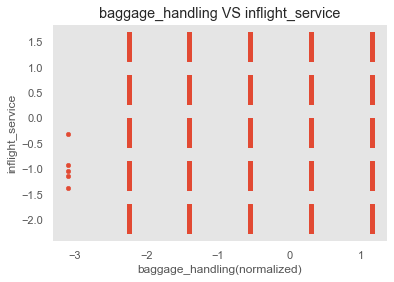

In [18]:
plt.style.use("ggplot")

X1 = airline_df[['baggage_handling','inflight_service']].values
scl.fit(X1)
X1_scl = scl.transform(X1)
plt.scatter(X1_scl[:, 1], X1_scl[:, 0]+np.random.random(X1_scl[:, 1].shape)/2, s=20)
plt.xlabel('baggage_handling(normalized)'), plt.ylabel('inflight_service')
plt.grid()
plt.title('baggage_handling VS inflight_service')
plt.show()

From the graph above, we have visual evideince we can initialize the cluster numbers to 25

In [27]:
X2 = airline_df[['baggage_handling','inflight_service']]

cls = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls.fit(X2)
newfeature = cls.labels_ # the labels from kmeans clustering

X = airline_df[['type_of_travel','customer_type','customer_class',
                'cleanliness','inflight_entertainment']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy (with kmeans for the second cluster)= ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy (with kmeans for the second cluster)=  86.64190023726788 +- 0.19566938406591602


This clustering didn't either help increase the accuracy on average or helped in the lowering of the deviation from the mean. 

Let's combine two different clusterings.

In [28]:
# get the first clustering
cls_1 = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls_1.fit(X1)
newfeature_1 = cls_1.labels_ 

# append on the second clustering
cls_2 = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls_2.fit(X2)
newfeature_2 = cls_2.labels_ 


X = airline_df[['type_of_travel', 'customer_type','customer_class']]
X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((X,pd.get_dummies(newfeature_1),pd.get_dummies(newfeature_2)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  86.62877151214623 +- 0.20232795395928746


After we combined two clusters, the accuracy decreased and the deviation increased, so it doesn't seem quite as accurate as before, let's tune `n_cluster` in both clusters.

In [29]:
%%time 
X1 = airline_df[['inflight_entertainment','cleanliness']]
X2 = airline_df[['baggage_handling','inflight_service']]

params = []
for n_1 in range(24,28):
    for n_2 in range(24,28):
        # get the first clustering
        cls_1 = KMeans(n_clusters=n_1, init='k-means++',random_state=5)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_2 = KMeans(n_clusters=n_2, init='k-means++',random_state=5)
        cls_2.fit(X2)
        newfeature_2 = cls_2.labels_ # the labels from kmeans clustering

        X = airline_df[['type_of_travel', 'customer_type','customer_class']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1),pd.get_dummies(newfeature_2)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y,cv=cv)
        params.append((n_1,n_2,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_1,n_2,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 24 24 Average accuracy =  86.62568253016462 +- 0.19816643731686281
Clusters 24 25 Average accuracy =  86.63263293346371 +- 0.2004374766520325
Clusters 24 26 Average accuracy =  86.63340489565383 +- 0.20212842099542916
Clusters 24 27 Average accuracy =  86.6295438918389 +- 0.1915652988142174
Clusters 25 24 Average accuracy =  86.62799919209682 +- 0.1976190629192582
Clusters 25 25 Average accuracy =  86.63108847229452 +- 0.19300295814909232
Clusters 25 26 Average accuracy =  86.62877163143267 +- 0.19624415329755257
Clusters 25 27 Average accuracy =  86.62413783042254 +- 0.1945682582061819
Clusters 26 24 Average accuracy =  86.62413783042254 +- 0.1988734583367214
Clusters 26 25 Average accuracy =  86.63108847229452 +- 0.1986378497058051
Clusters 26 26 Average accuracy =  86.63108859158095 +- 0.20223083634846423
Clusters 26 27 Average accuracy =  86.62877169107588 +- 0.19925632929039275
Clusters 27 24 Average accuracy =  86.62799925174002 +- 0.20135260718230347
Clusters 27 25 Aver

It seems that all the accuracies and deviations became worse. So the best approach is to only use the first cluster rather than use the second cluster or combine both clusters.

Now we have already made two clusters, what if we cluster the categorical variables? Let's use KMode algorithm to cluster all categorical variables.

#### Categorical variables clustering

In [22]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from plotnine import *
import plotnine

In [52]:
X3 = airline_df[['type_of_travel','customer_type','customer_class','Gender']]
dfMatrix = X3.to_numpy()

In [53]:
dfMatrix

array([['Personal Travel', 'Loyal Customer', 'Eco Plus', 'Male'],
       ['Business travel', 'disloyal Customer', 'Business', 'Male'],
       ['Business travel', 'Loyal Customer', 'Business', 'Female'],
       ...,
       ['Personal Travel', 'Loyal Customer', 'Eco', 'Female'],
       ['Business travel', 'Loyal Customer', 'Business', 'Male'],
       ['Personal Travel', 'Loyal Customer', 'Eco', 'Female']],
      dtype=object)

In [31]:
cost = []

for cluster in range(10, 24):
    try:
        kmode = KModes(n_jobs = 7, n_clusters = cluster, init = 'Huang', n_init=5, random_state = 5)
        kmode.fit_predict(dfMatrix)
        cost.append(kmode.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20
Cluster initiation: 21
Cluster initiation: 22
Cluster initiation: 23


In [32]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(10, 24), 'Cost':cost})
df_cost

,Cluster,Cost
0,10,21925.0
1,11,13996.0
2,12,13031.0
3,13,9858.0
4,14,10284.0
5,15,5592.0
6,16,3827.0
7,17,2319.0
8,18,2853.0
9,19,1415.0


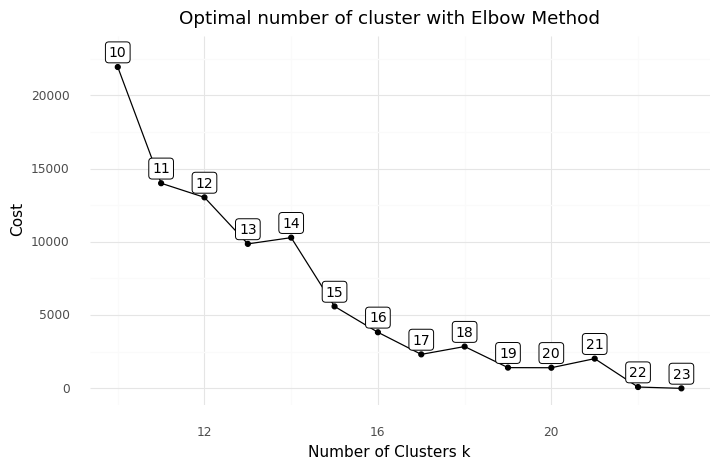

<ggplot: (-9223371876061621724)>

In [33]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

From the graph above, we chose the elbow point = 17

In [34]:
kmodes = KModes(n_jobs = 7, n_clusters = 17, init = 'Huang', n_init=5, random_state = 5)
kmodes.fit_predict(dfMatrix)

array([15,  1,  9, ...,  3, 16,  3], dtype=uint16)

In [35]:
kmodes.cluster_centroids_

array([['Business travel', 'Loyal Customer', 'Eco', 'Male'],
       ['Business travel', 'disloyal Customer', 'Business', 'Male'],
       ['Business travel', 'disloyal Customer', 'Business', 'Female'],
       ['Personal Travel', 'Loyal Customer', 'Eco', 'Female'],
       ['Personal Travel', 'Loyal Customer', 'Business', 'Male'],
       ['Business travel', 'Loyal Customer', 'Eco Plus', 'Female'],
       ['Personal Travel', 'disloyal Customer', 'Eco', 'Male'],
       ['Business travel', 'Loyal Customer', 'Eco', 'Female'],
       ['Business travel', 'disloyal Customer', 'Eco Plus', 'Female'],
       ['Business travel', 'Loyal Customer', 'Business', 'Female'],
       ['Personal Travel', 'Loyal Customer', 'Eco', 'Male'],
       ['Personal Travel', 'Loyal Customer', 'Eco Plus', 'Female'],
       ['Business travel', 'disloyal Customer', 'Eco', 'Male'],
       ['Business travel', 'disloyal Customer', 'Eco', 'Female'],
       ['Personal Travel', 'Loyal Customer', 'Business', 'Female'],
       ['

In [58]:
X = airline_df[['inflight_entertainment','cleanliness','baggage_handling','inflight_service']]

newfeature_3 = kmodes.labels_ 

X = np.column_stack((X, pd.get_dummies(newfeature_3)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  86.597109193351 +- 0.2459535820030293


By clustering all categorical variables, we didn't achieve our goal here - increase average accuracy and decrease the deviation.

In [38]:
# get the first clustering
cls_1 = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls_1.fit(X1)
newfeature_1 = cls_1.labels_ 

# append on the second clustering
cls_2 = KMeans(n_clusters=25, init='k-means++',random_state=5)
cls_2.fit(X2)
newfeature_2 = cls_2.labels_ 

#append on the third Kmode clustering
newfeature_3 = kmodes.labels_ 

#X = airline_df[['type_of_travel', 'customer_type','customer_class']]
#X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])

X = np.column_stack((pd.get_dummies(newfeature_1),pd.get_dummies(newfeature_2), pd.get_dummies(newfeature_3)))
scl.fit(X)
X_scl = scl.transform(X)

acc = cross_val_score(clf,X_scl,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  86.56467371950122 +- 0.24959679592207384


By clustering all three clusters, we didn't achieve our goal here - increase average accuracy and decrease the deviation.

## 5.0 Modeling and Evaluation 2- Evaluate and Compare

Since the second and third clusters didn't help increase the average accuracy. Let's see if we can make things simpler by only clustering the first set of attributes.

In [39]:
params = []
for n_1 in range(24,28):
    cls_1 = KMeans(n_clusters=n_1, init='k-means++',random_state=5)
    cls_1.fit(X1)
    newfeature_1 = cls_1.labels_ 
    X = airline_df[['type_of_travel','customer_type','customer_class','baggage_handling','inflight_service']]
    X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
    X = np.column_stack((X,pd.get_dummies(newfeature_1)))
    scl.fit(X)
    X_scl = scl.transform(X)
    acc = cross_val_score(clf,X_scl,y=y,cv=cv)
    params.append((n_1,n_2,acc.mean()*100,acc.std()*100))

    print ("Clusters",n_1,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 24 Average accuracy =  86.65348402407457 +- 0.2047438015629603
Clusters 25 Average accuracy =  86.64962254311386 +- 0.20437778931245346
Clusters 26 Average accuracy =  86.6457614796557 +- 0.20200071648242135
Clusters 27 Average accuracy =  86.64730606011133 +- 0.1965274961151841


So it seems that the accuracy has improved when cluster= 24, but the standard deviation doesn't decrease. Now, let's also try to replace features using some slightly different clustering algorithms and see what works best for classification.

We will try Agglomerative Clustering and DBSCAN below. 

In [40]:
%%time 

from sklearn.cluster import AgglomerativeClustering

airline_df_down = airline_df.sample(n = 30000, random_state=5).copy()
y_down = airline_df_down['satisfaction'].copy()

X1 = airline_df_down[['inflight_entertainment','cleanliness']]

params = []
for link in ['ward', 'complete', 'average']:
    for n_1 in range(24,28):
        cls_1 = AgglomerativeClustering(n_clusters=n_1, linkage=link)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ 
        X = airline_df_down[['type_of_travel','customer_type','customer_class','baggage_handling','inflight_service']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y_down,cv=cv)
        params.append((n_1,n_2,acc.mean()*100,acc.std()*100))

        print ("C=",n_1,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 24 ward Average accuracy =  86.24000000000001 +- 0.5986651818838313
C= 25 ward Average accuracy =  86.27 +- 0.5997128942715475
C= 26 ward Average accuracy =  86.26666666666667 +- 0.5882176467941098
C= 27 ward Average accuracy =  86.27 +- 0.5867897598137022
C= 24 complete Average accuracy =  86.26666666666665 +- 0.5846176338238337
C= 25 complete Average accuracy =  86.26333333333334 +- 0.5907528153880341
C= 26 complete Average accuracy =  86.24666666666668 +- 0.5996665740225977
C= 27 complete Average accuracy =  86.25666666666667 +- 0.5983402970811103
C= 24 average Average accuracy =  86.28333333333333 +- 0.6037383539249443
C= 25 average Average accuracy =  86.28 +- 0.6031767752676004
C= 26 average Average accuracy =  86.26666666666667 +- 0.5972157622389641
C= 27 average Average accuracy =  86.26666666666667 +- 0.5938574464184713
Wall time: 4min 27s


Agglomerative Clustering didn't either improve the average accuracy nor the deviation comparing to Kmeans clustering.

Let's take a look at DBSCAN.

In [59]:
%%time 

from sklearn.cluster import DBSCAN

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,8):
        cls_1 = DBSCAN(eps=eps, min_samples=mpts)
        cls_1.fit(X1)
        newfeature_1 = cls_1.labels_ 

        X = airline_df[['type_of_travel','customer_type','customer_class','baggage_handling','inflight_service']]
        X= pd.get_dummies(X, columns=['type_of_travel', 'customer_type','customer_class'])
        X = np.column_stack((X,pd.get_dummies(newfeature_1)))
        scl.fit(X)
        X_scl = scl.transform(X)
        acc = cross_val_score(clf,X_scl,y=y,cv=cv)
        params.append((n_1,acc.mean()*100,acc.std()*100))

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.1 6 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.1 7 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.125 5 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.125 6 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.125 7 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.15 5 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.15 6 Average accuracy =  86.65039516137941 +- 0.20494334625233046
0.15 7 Average accuracy =  86.65039516137941 +- 0.20494334625233046
Wall time: 21min 16s


## 6.0 Modeling and Evaluation 3- Visualize Results

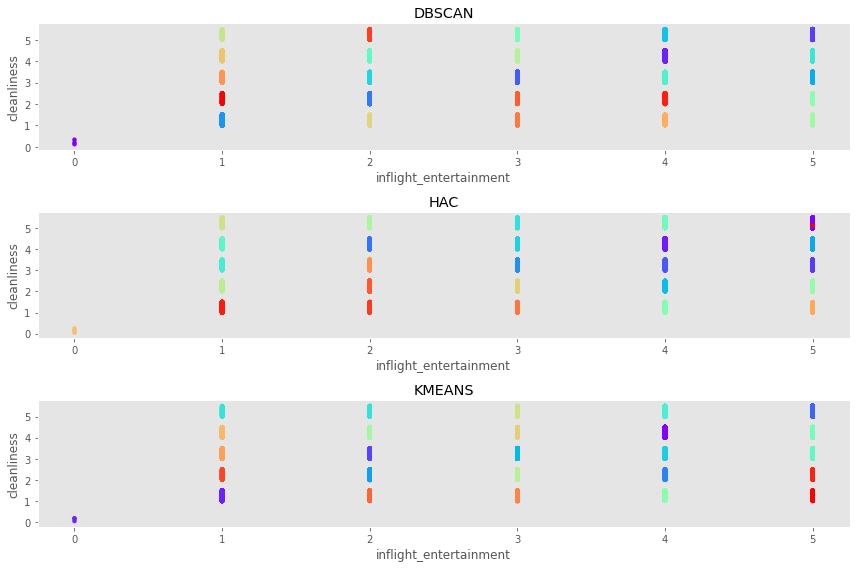

In [139]:
X1 = airline_df_down[['inflight_entertainment','cleanliness']]

cls = DBSCAN(eps=0.125, min_samples=6)
cls.fit(X1)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=27, linkage='complete')
cls.fit(X1)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=24, random_state=5)
cls.fit(X1)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,1,i+1)
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1]+np.random.random(X1.iloc[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('inflight_entertainment'), plt.ylabel('cleanliness')
    plt.grid()
    plt.title(title[i])
    
plt.tight_layout()
plt.show()

## 7.0 Modeling and Evaluation 4 - Summarize the Ramifications

Even by deploying and testing several different clustering algorithms (DBSCAN, HAC and Kmeans) there were no notable improvements to classifcation accuracy than using just original features in the dataset. 

We used heatmap as reference and picked up two pairs of attributes based on their correlation coefficients. First, we chose  `type_of_travel`,`customer_type`,`customer_class`,`baggage_handling`,`inflight_service`,`cleanliness`,`inflight_entertainment` from all attributes and used ramdom forest to build a model to get an original model accuracy (86.64576%) and standard deviation (+/-0.189697). Then we clustered `cleanliness` and `inflight entertianment` as the first clustering. Then we clustered `baggage_handling` and `inflight_service` as the second clustering. During this process, we found out the first clustering only improved the average accuracy by 0.003% (86.648078%) and the standard deviation didn't get decreased (+- 0.20114). The second clustering neither improve the average accuracy(86.6419%) nor the standard deviation (+- 0.195669).

Next step, we combined two clusters we created, but the reslut got worse (86.62877 +- 0.2023).

In order to get better results, we iterated the clustering numbers from 24 to 27 in both clusters and then combined two clusters. Sadly, none of the accuracies we got had higher values than the original accuracy without clustering.

Before we moved further, we started to use Kmodes to cluster all categorical variables in the dataset (`type_of_travel`,`customer_type`,`customer_class`,`Gender`). According to cost and cluster plot (elbow plot), we chose cluster number 17. When we only clustered the categorical variables, we got 86.597 +- 0.246. When we clustered all three clusters, the accuracy we got is 86.565 +- 0.2496.

Therefore, all the above approaches didn't seem to improve the average accuracy of the radom forest model. Only the first cluster improved the accuracy a little bit.

Since we realized the fist cluster with cluster number = 25 improved our accuracy, then we used only the first cluster to iterate through number of clusters from 24 to 27. When cluster number= 24, the accuracy increased to 86.653.

Now we used different clustering algorithms to apply on the first cluster and compare the results from Kmeans we obtained before. Neither Agglomerative Clustering nor DBSCAN provided promising results comparing to Kmeans. We also noticed that due to the natrual of our ordinal variables, DBSCAN yields the same result if the distance measure (eps) is too small.

## 8.0 Deployment 

The goal of this analysis was to help determine if clustering customer flight records together can be used to increase flight satisfaction classification accuracy.  Clustering did not provide any major or noticeable improvements to classification models.  Although there is value in the clustering models built.  

As new records are recieved and the training dataset grows, the current classification algorithm training times will not be scalable.  Clustering in this regard will act as feature reduction.  By using clusters instead of features as opposed to each individual feature this will reduce training time while still maintaining the same accuracy when using the full set of features.

While clustering does not improve the accuracy, these models have much to offer to airlines companies such as  United, Southwest, Delta etc.  This can be used for them to measure how their potential customer base changes over time.  Different clusters of customer can receive different promotional and marketing offers based on their characteristics and summary statistics of features.

This is similarly helpful to vendors.  Vendors that offer technology and hardware services to airlines as well as entertainment products to passengers can benefit from knowing how different customer segments are grouped together and their similar traits/tendencies across all variables and features.


To deploy the model there are multiple options that would available to the end customer.  Firstly, the full code and all documentation would be placed on a private GitHub to be given to the client.  This can be used or referenced by their development team, auditors etc. or anyone at the customer who needs access to the raw code and full documentation.  There are multiple choices for how the end code can be used by the customer

1. Jupyter notebook: Depending on the python and technical skills of the customers employees, a simple jupyter notebook could be built that would allow the customer to manually upload a CSV or excel file to run clustering models and predictions on new or existing data.

2. Web app deployment:  If the company is less technically savvy then a webapp using Django/Flask framework can be created to make operational use of the models very easy.  Similar as above, there could be a button that allows manual uploading of excel/csv files or from a database to allow the customer to run the model without any python coding.

3. Python Executable:  If the customer does not want to pay to host a webapp on the cloud, another option would be to create an executable using pyinstaller.  This would function similar to the webapp but would be run locally on the customers desktop and python skills are not needed to run.

4. Sav File:  The customer could use the pickle/joblib libraries of python to export the clustering or classifcation models to a SAV file,  this removes the need for reoccuring training as the Sav file can be directly imported into python and be use to make classifcation or clustering predictions on live production data or new records.


While the clustering did not drastically include accuracy,  there could be external factors such as new technologies, pandemics, competition, etc that could create or change the factors that influence the clustering of records and the trends of the customer base.  When possible data should continuously be collected so the model can be rerun with the latest data for training purposes.  Airline companies can use incentive-based surveys to get all of the ordinal ranking information from their customer base whenever possible.  The original dataset contains ~130K records.  As new datapoints are gathered it is advised to remove the oldest from the dataset and on a quarterly basis rerun the models to be up to date with current trends.

## 9.0 Elbow Method and Silhouette Analysis - Exceptional Work

Since we only did the elbow plot for our third categorical cluster, let's draw elbow plots for the first and second clusters.

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

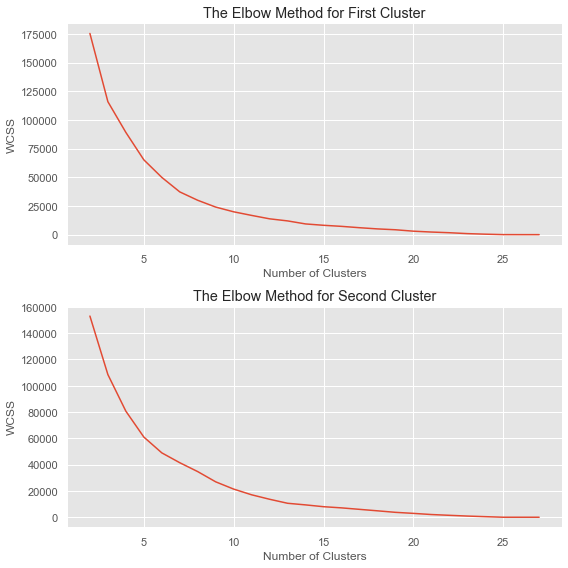

In [48]:
X1 = airline_df[['inflight_entertainment','cleanliness']]
X2 = airline_df[['baggage_handling','inflight_service']]

wcss_1=[]
wcss_2=[]

for i in range(2,28):
    cls_1=KMeans(n_clusters=i, init='k-means++',random_state=5)
    cls_1.fit(X1)
    wcss_1.append(cls_1.inertia_)

for j in range(2,28):
    cls_2=KMeans(n_clusters=j, init='k-means++',random_state=5)
    cls_2.fit(X2)
    wcss_2.append(cls_2.inertia_)


f,ax=plt.subplots(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(range(2,28),wcss_1)
plt.title('The Elbow Method for First Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(2,1,2)
plt.plot(range(2,28),wcss_2)
plt.title('The Elbow Method for Second Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
f.tight_layout()
plt.show()

From the elbow plots above, we found out that when both clusters' cluster numbers witin the range from 5 to 10, each number may be an elbow point as the sum of squares of the distances of each data point within all clusters decreased rapidly before 5 and then slowly after 10. 

Thus, let's use Silhouette Analysis on these two clusters to review silhouette scores for some clusters with the cluster numbers from 5 to 10.

For n_clusters = 5 The average silhouette_score is : 0.5770563162652371
For n_clusters = 6 The average silhouette_score is : 0.6314652675859881
For n_clusters = 7 The average silhouette_score is : 0.6670928927751019
For n_clusters = 8 The average silhouette_score is : 0.6950755472355659
For n_clusters = 9 The average silhouette_score is : 0.7481373190067423


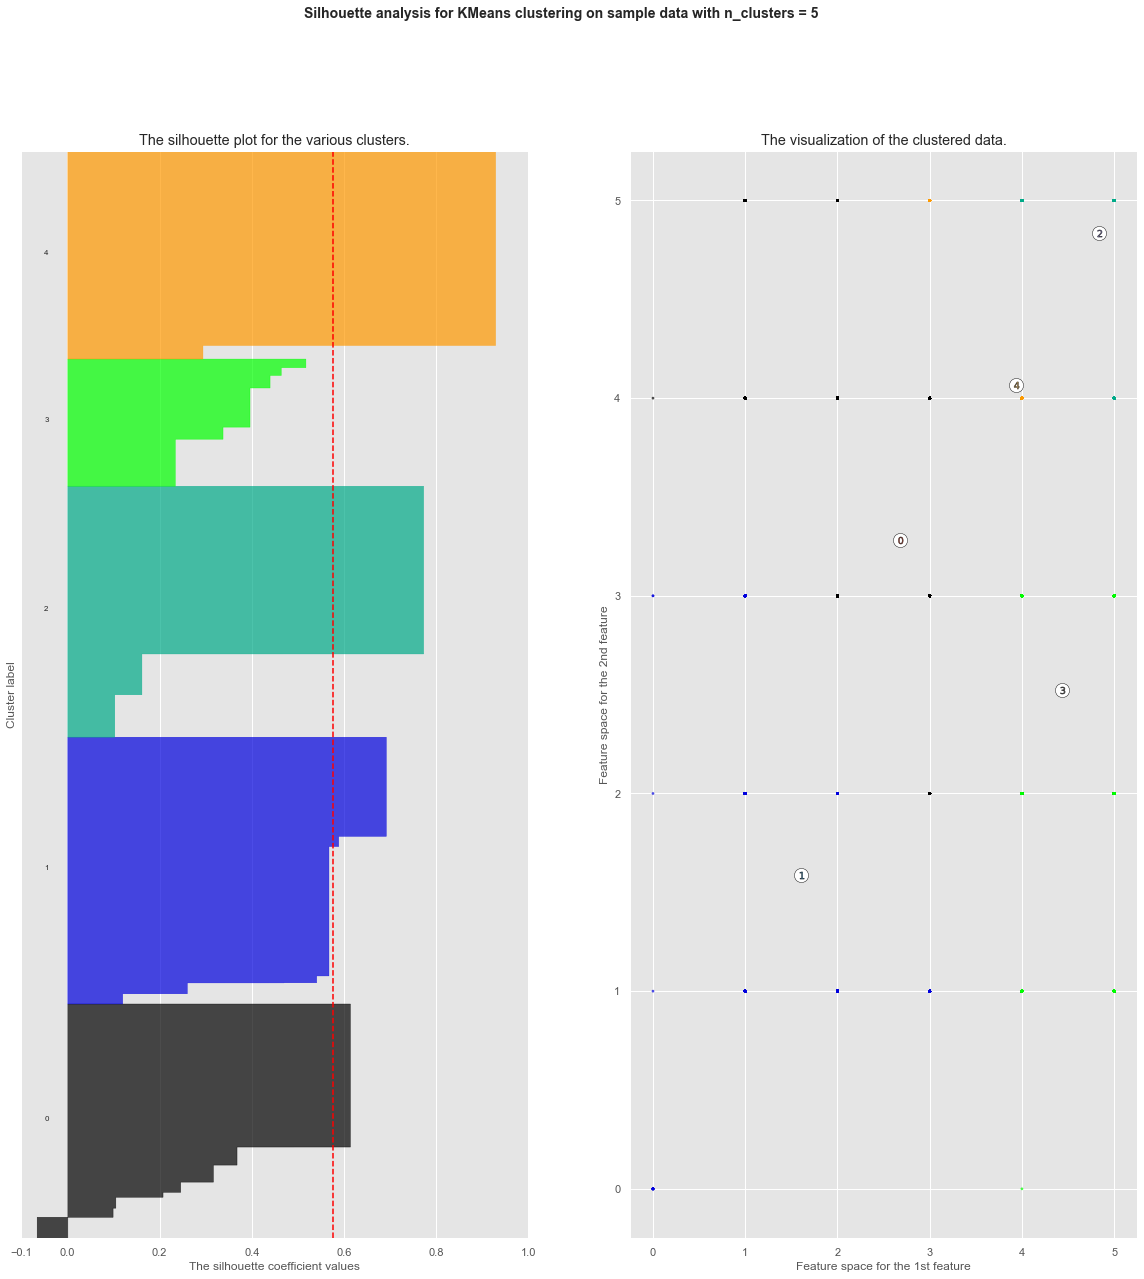

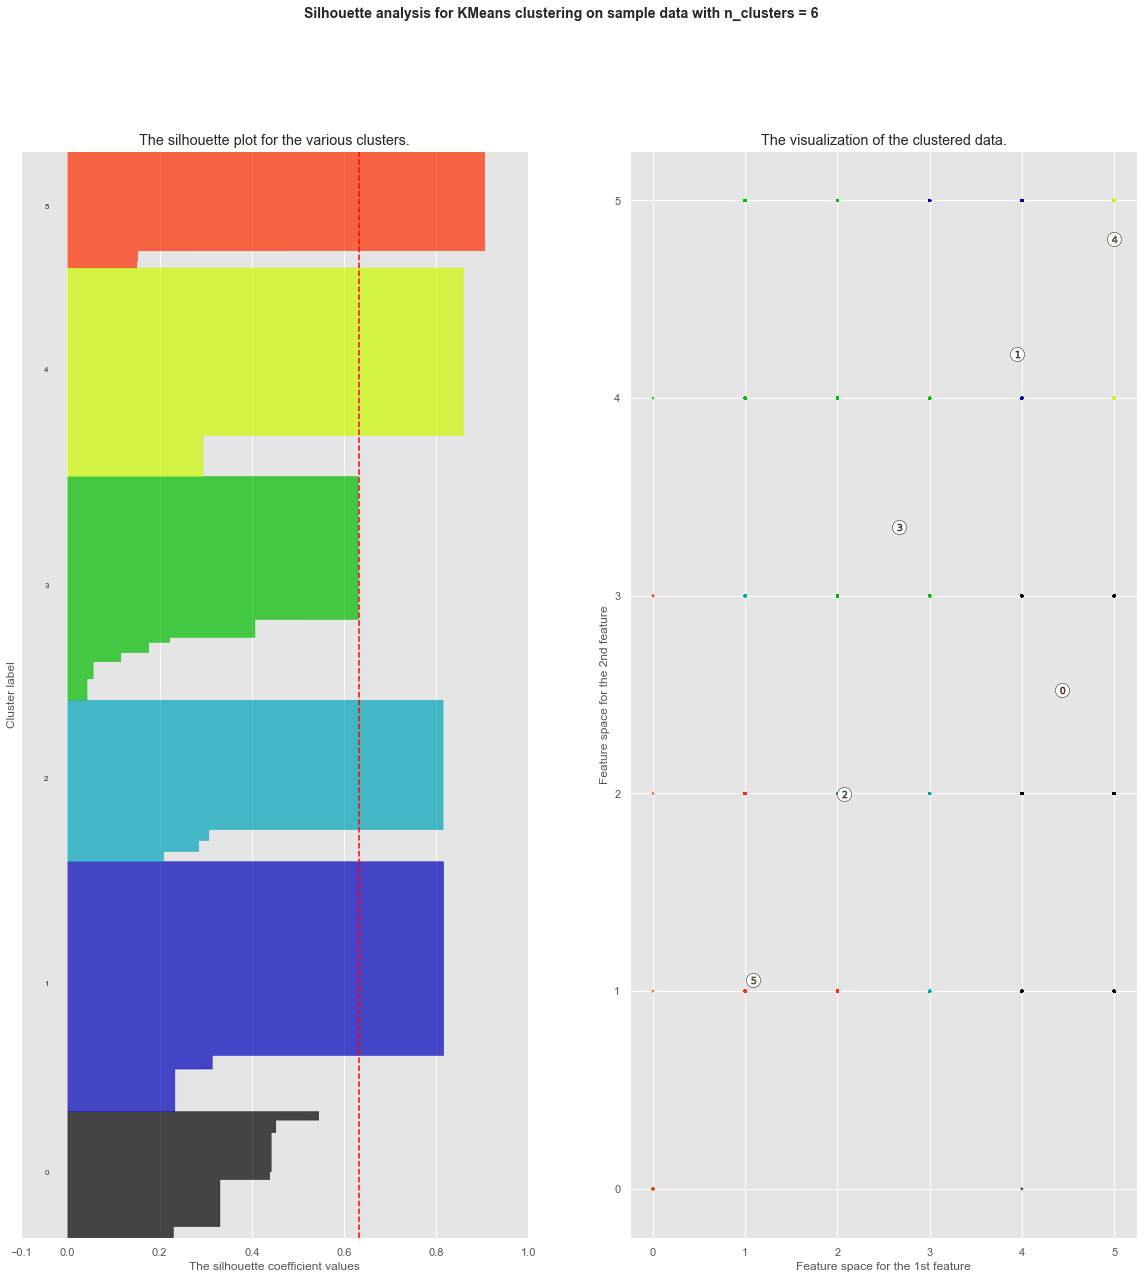

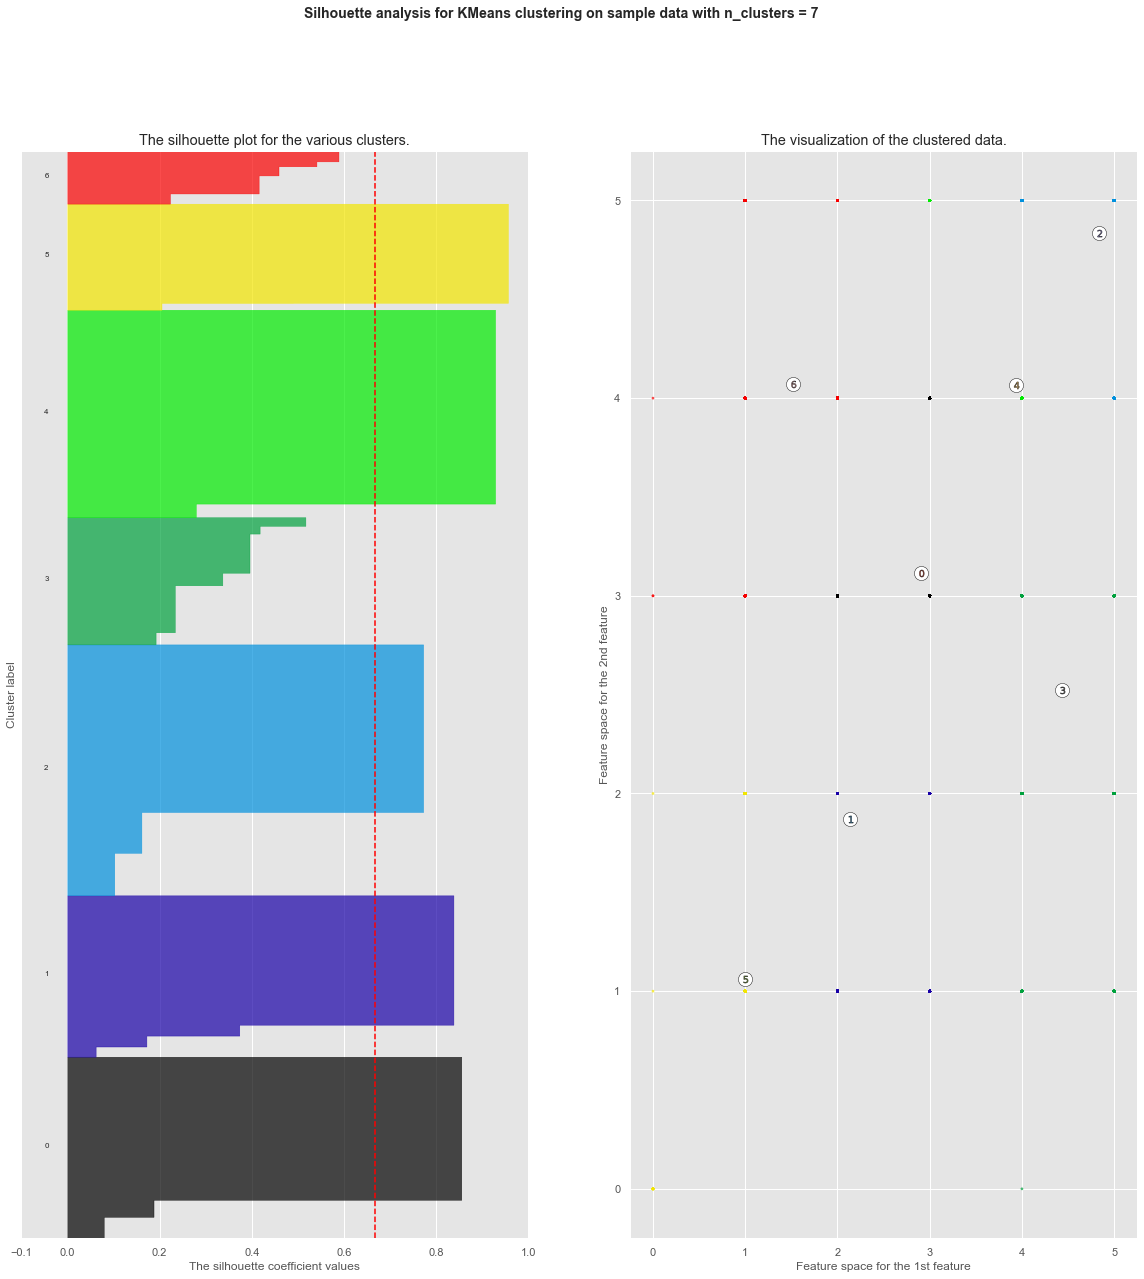

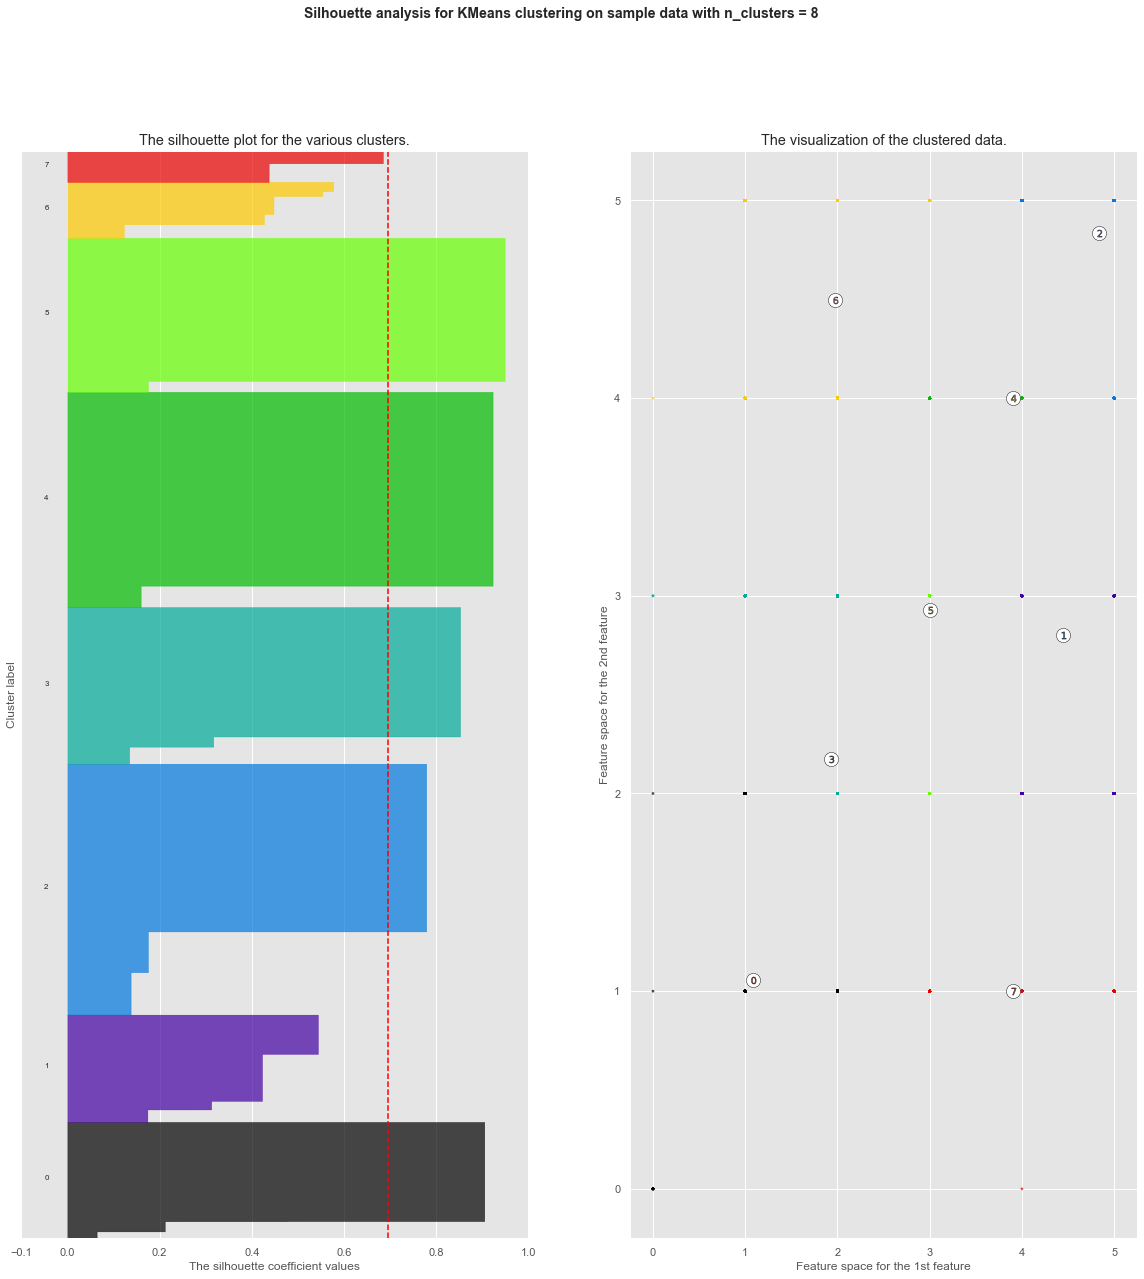

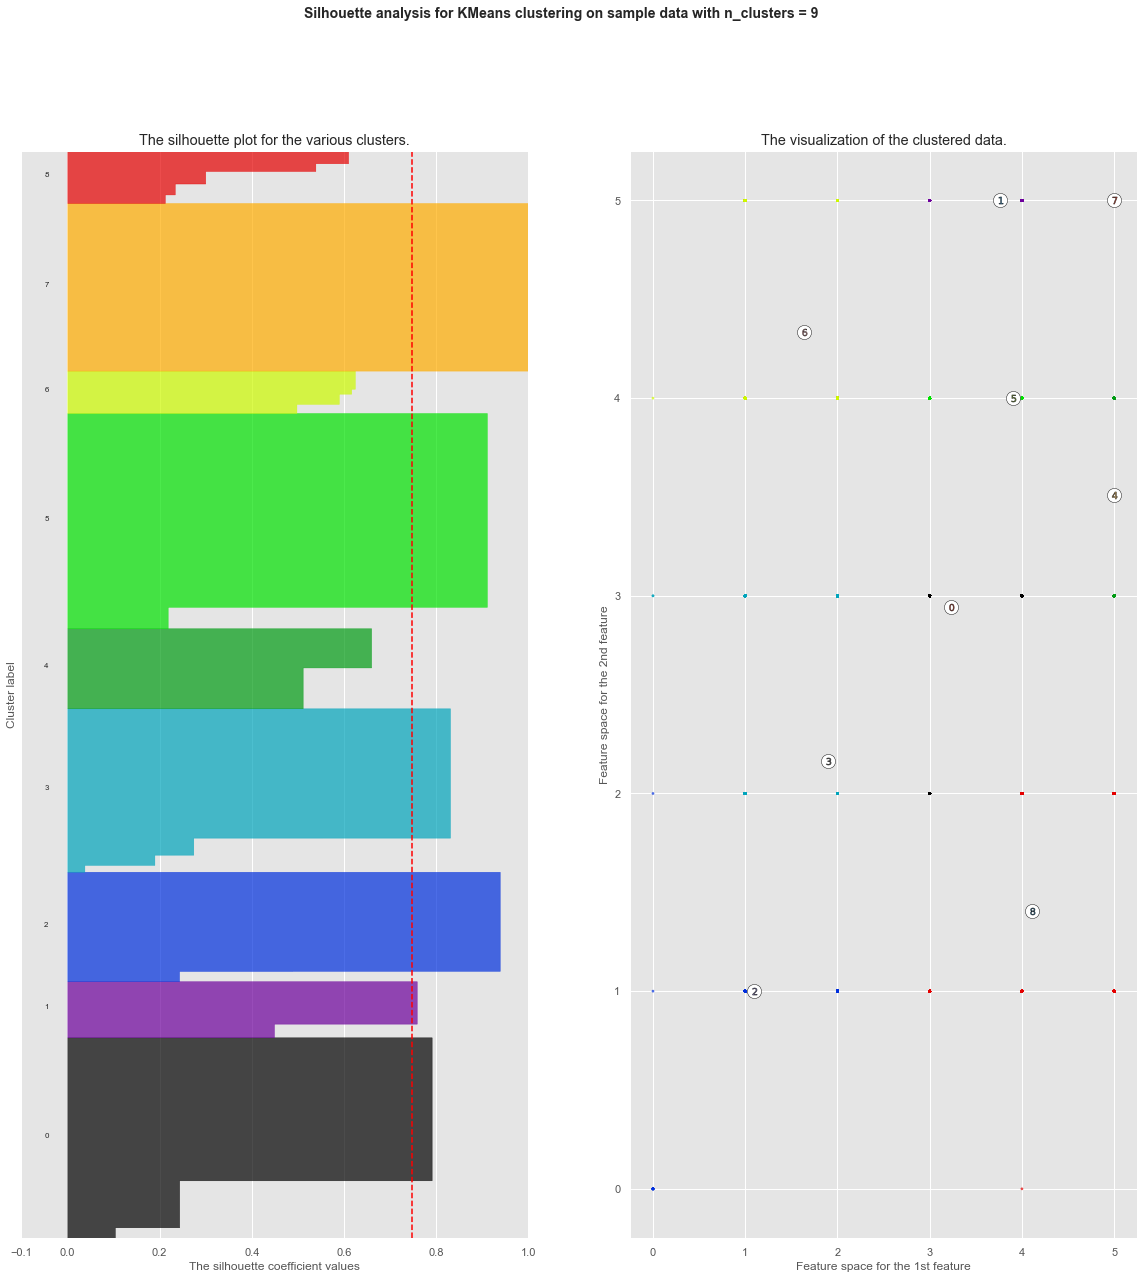

In [44]:
range_n_clusters_1 = [5,6,7,8,9]
for n_clusters in range_n_clusters_1:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20,20)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=8)

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1.iloc[:, 0], X1.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

We noticed that when number of clusters increases, average silhouette score also increases. What we should pay attention is that we cluster number = 5, silhouette score of the number 0 cluster has negative value, which means some points were incorrectly clustered into that cluster. So cluster number equal to 5 is not an optimal value. 

If we keep increasing the number of clusters, we can find out when cluster numbers equal to 23, the cost (WCSS) will equal to 0. 

For n_clusters = 4 The average silhouette_score is : 0.5116898167524329
For n_clusters = 5 The average silhouette_score is : 0.5534554684265083
For n_clusters = 6 The average silhouette_score is : 0.5891917734334038
For n_clusters = 7 The average silhouette_score is : 0.6610171848098189
For n_clusters = 10 The average silhouette_score is : 0.7700463439934014


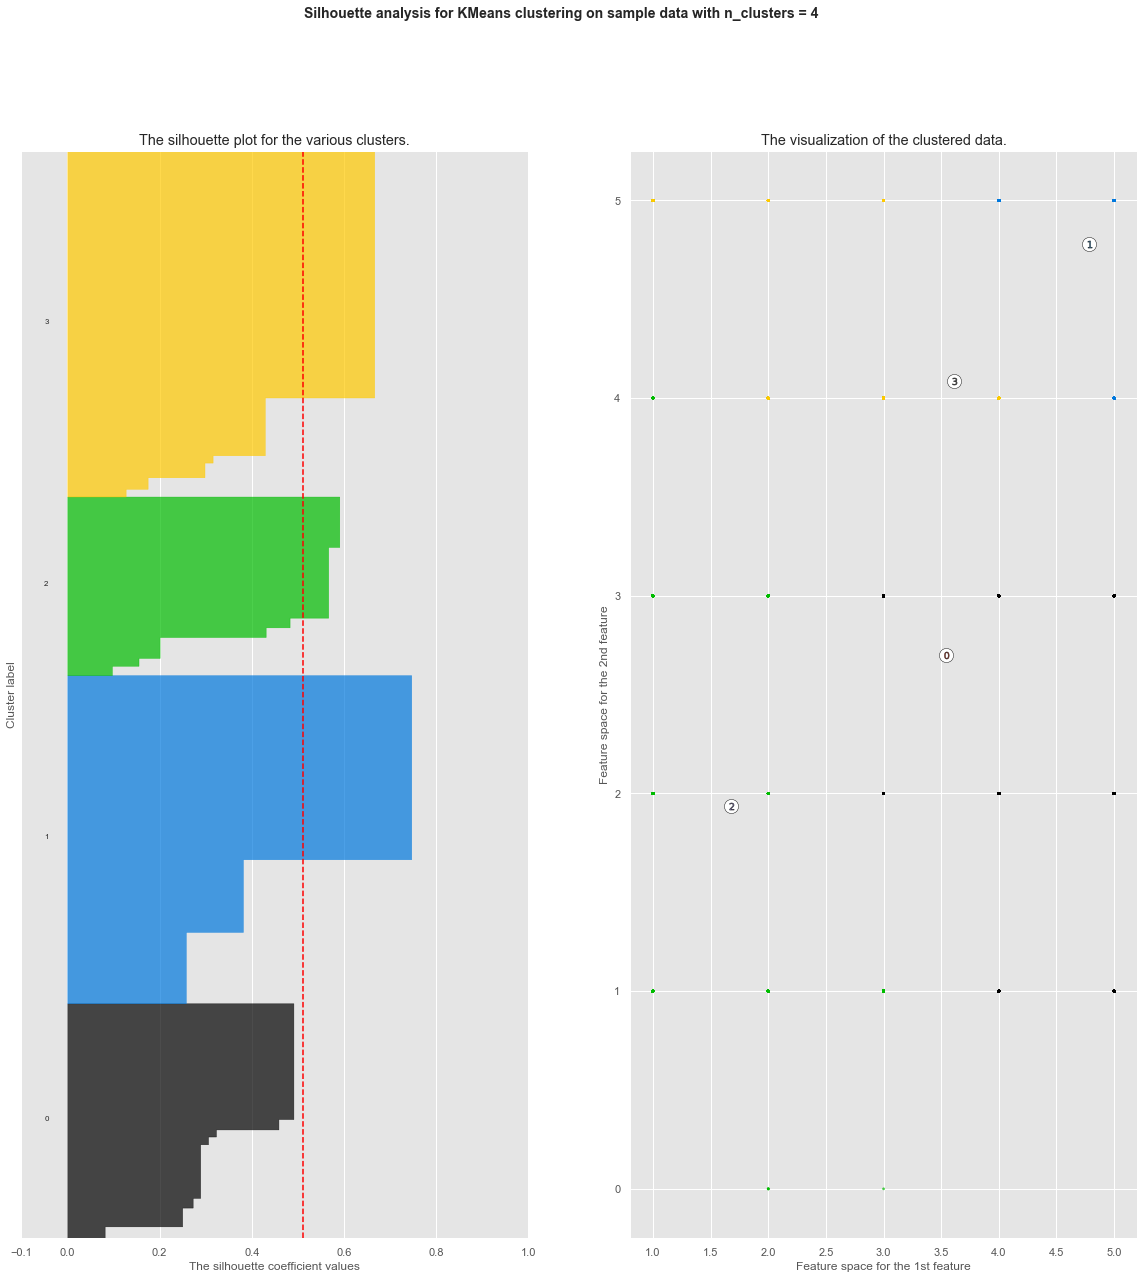

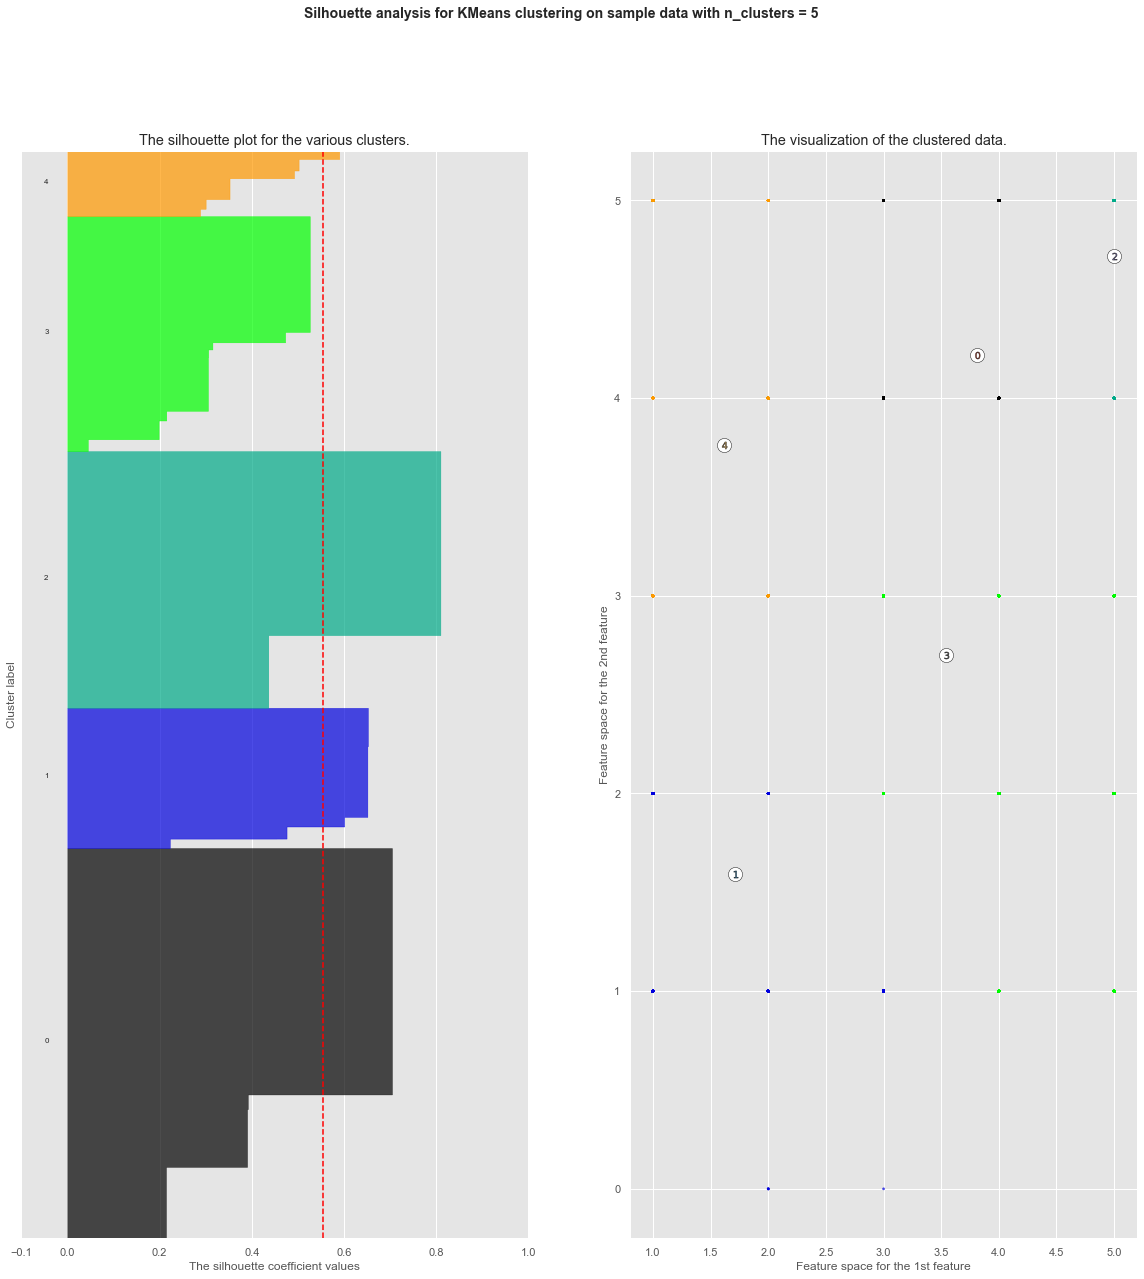

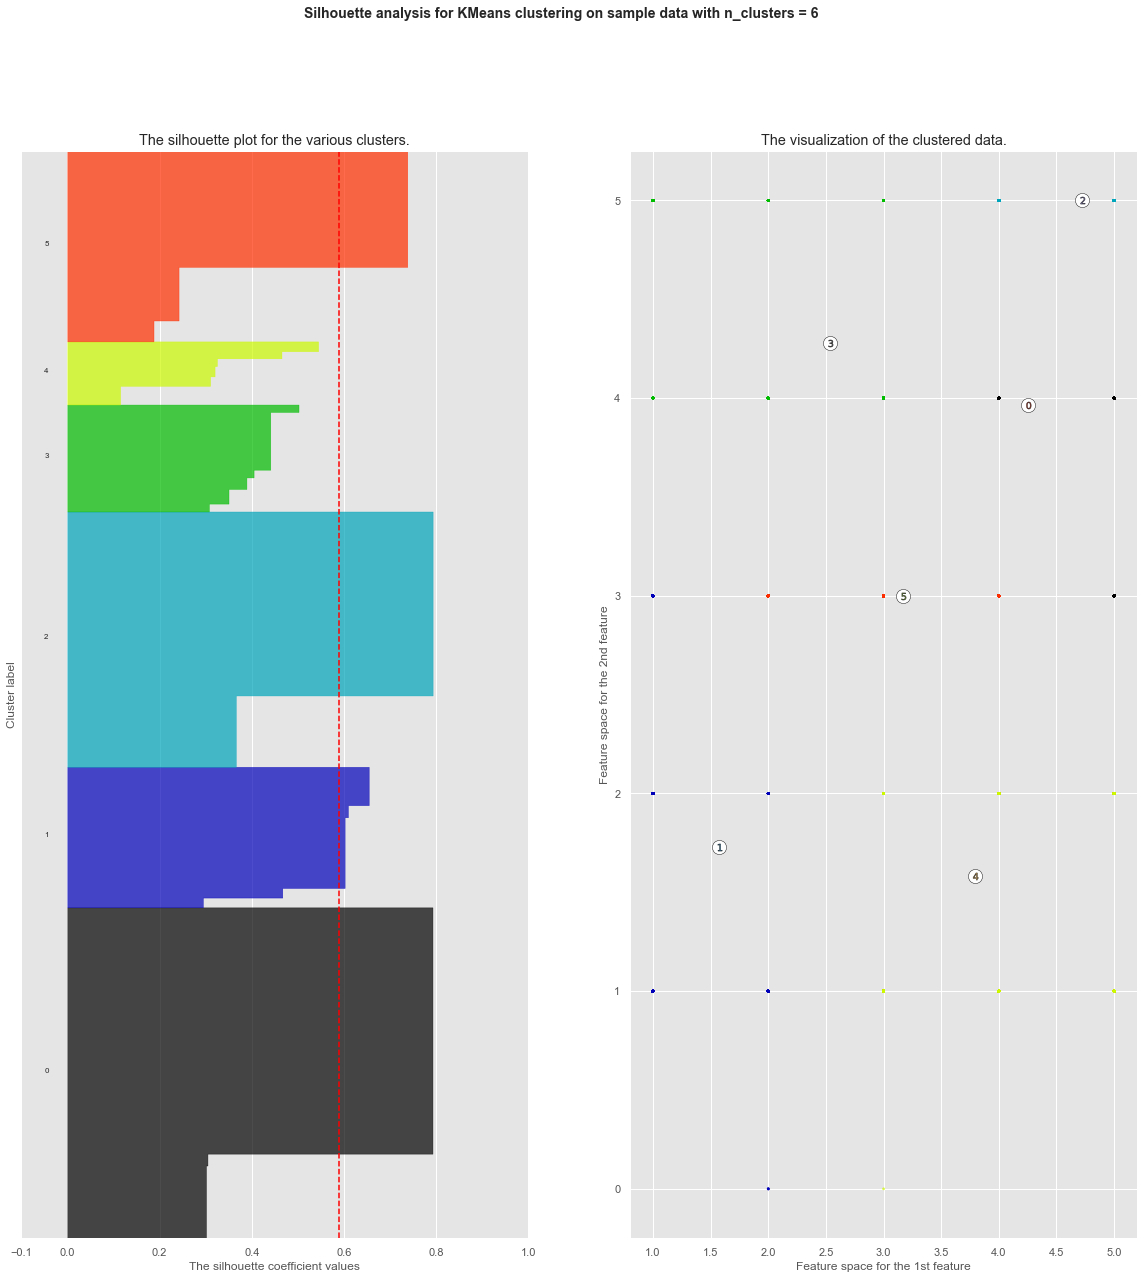

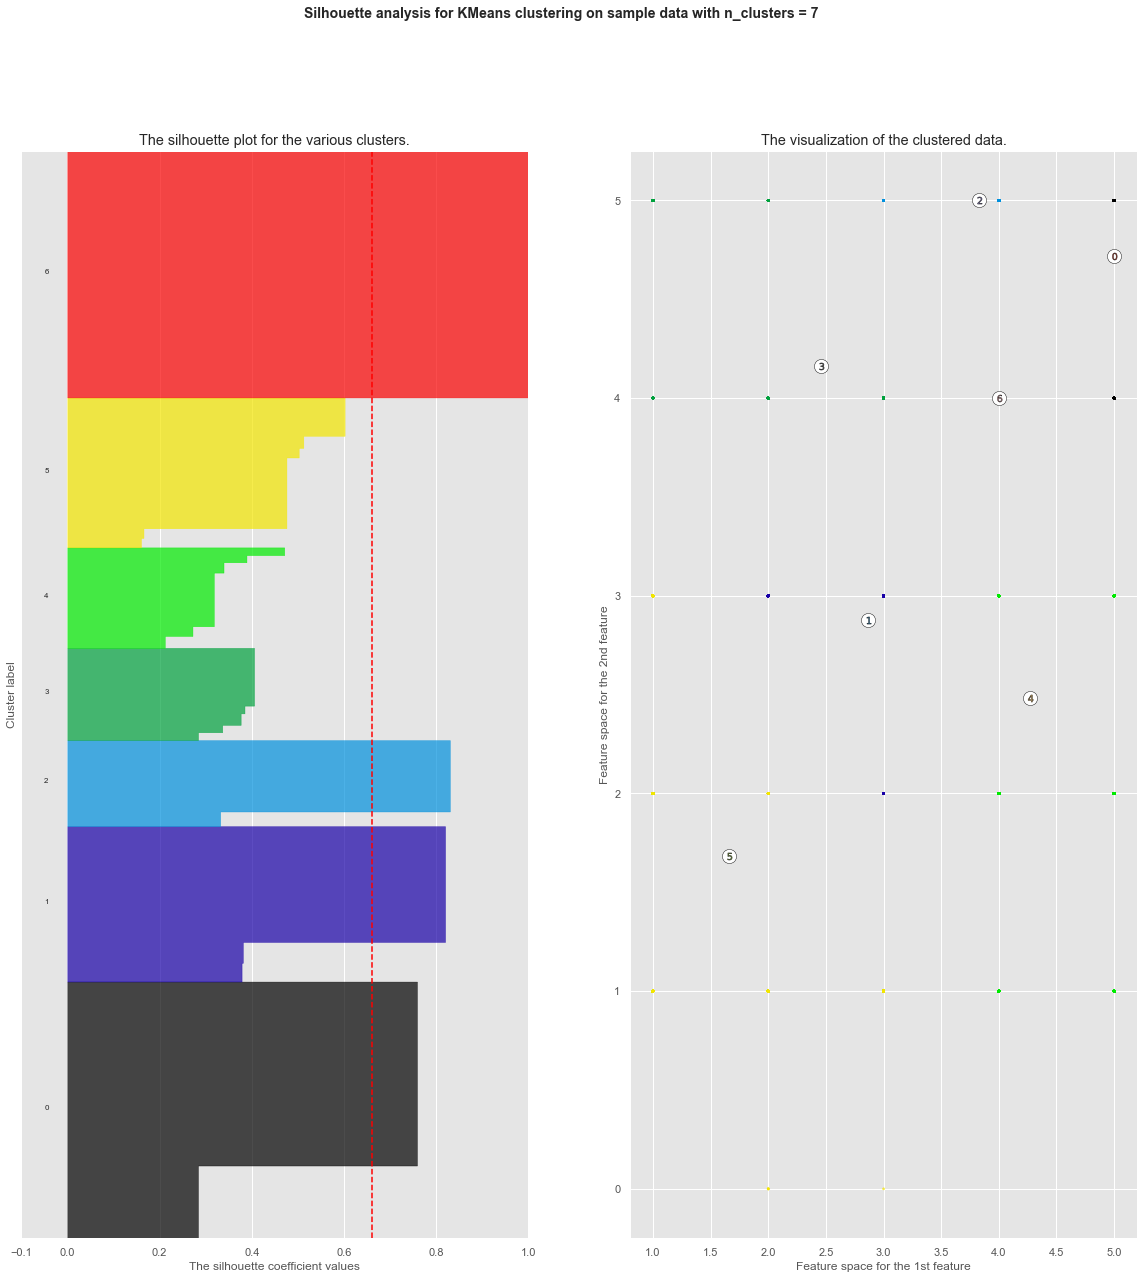

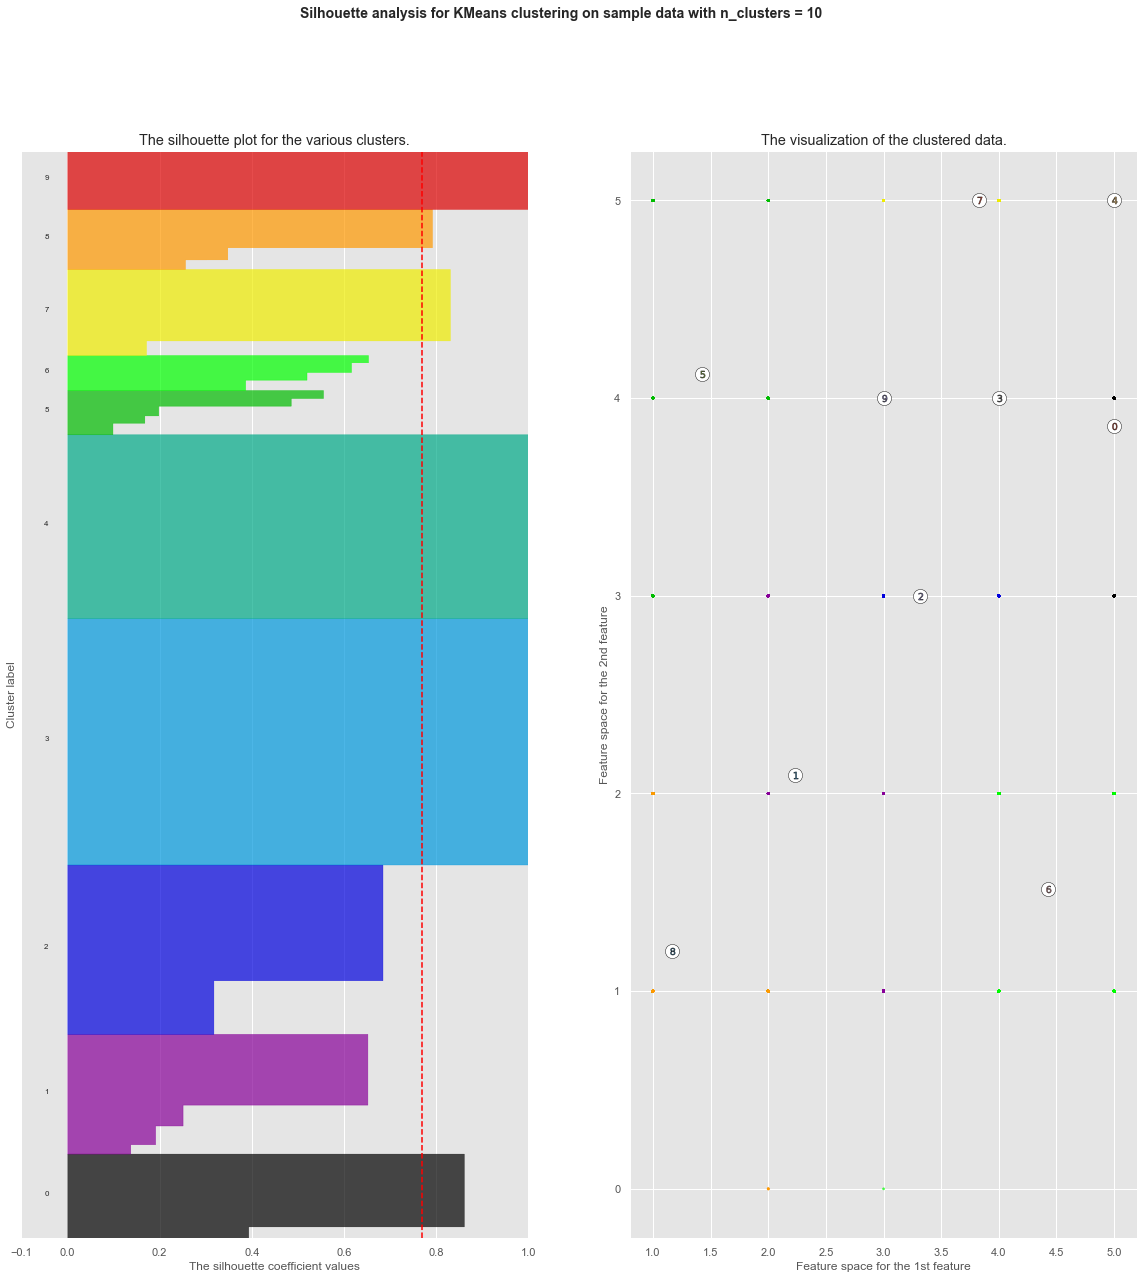

In [47]:
range_n_clusters_2 = [4,5,6,7,10]
for n_clusters in range_n_clusters_2:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20,20)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(X2)

    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),fontsize=8)

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X2.iloc[:, 0], X2.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

All the silhouette coefficient values are positive in the second clusters when we iterated through different number of clusters, which means each point was correctly clustered. 